# Reward Training Analysis

Cohort 2

In [1]:
from rt_extension import Reward_Training
from pathlib import Path

In [ ]:
# day = input("Day: ")
# method = input("Calculation method (modified, baseline, standard): ")
# directory_path = Path(input("Path for plots: "))

day = "day_1"
# day = "day_10"
method = 'standard'
experiment_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Training\Day1\mPFC"
# experiment_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Training\Day10\mPFC"
brain_region = '#FFAF00'

# experiment_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Training\Day1\NAc"
# experiment_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Training\Day10\NAc"
# brain_region = '#15616F'
region = experiment_path.rsplit('\\', 1)[-1]

# directory_path = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Training\\plots\\{method}\\{day}\\{region}')
directory_path = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Training\\plots\\14trials\\RT_1_2\\{day}\\{region}')
print(directory_path)

# Create the directory (with parents=True to create nested directories)
directory_path.mkdir(parents=True, exist_ok=True)

C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Training\plots\14trials\RT_1_2\day_1\mPFC


In [3]:
exp = Reward_Training(experiment_path, behavior_folder_path=None)

In [4]:
exp.rt_processing()

dict_items([])


dict_items([])
No data for event 1
No data for event 2
No data for event 3
No data for event 4
No data for event 5
No data for event 6
No data for event 7
No data for event 8
No data for event 9
No data for event 10
No data for event 11
No data for event 12
No data for event 13
No data for event 14


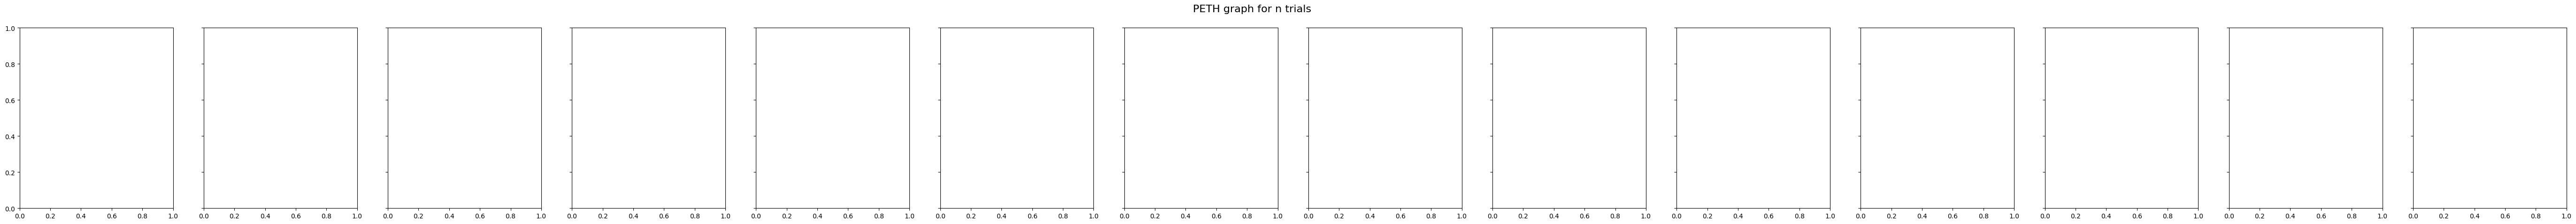

In [5]:
# Compute PETH around the first 5 sound cues
exp.rt_compute_peth_per_event(behavior_name='sound cues', n_events=14, pre_time=5, post_time=10, bin_size=0.1)
# Plot the PETH
exp.rt_plot_peth_per_event(directory_path, error_type='sem', color=brain_region, display_pre_time=4, display_post_time=10, yticks_interval=2)


In [6]:
# # common_time_axis, peri_event_signals = exp.compute_peth_for_selected_events([14])
# # exp.plot_peth_for_all_sounds(common_time_axis, peri_event_signals)
# common_time_axis, peri_event_signals = exp.compute_peth_for_all_sounds()
# exp.plot_peth_for_all_sounds(common_time_axis, peri_event_signals)

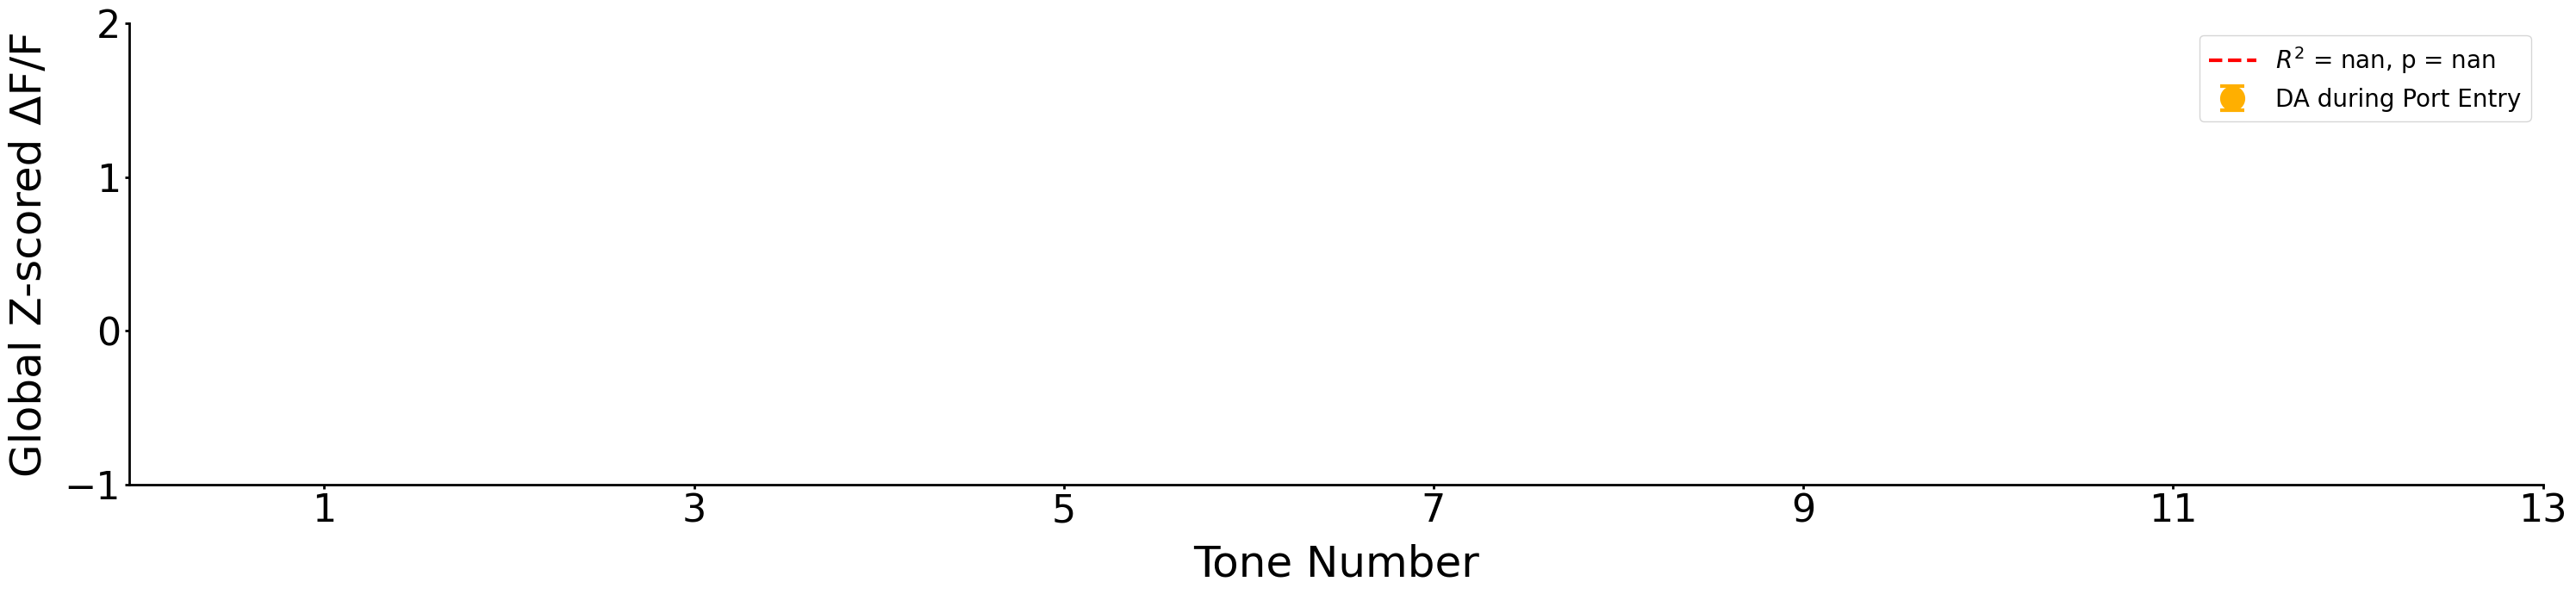

Slope: nan, Intercept: nan
Pearson correlation coefficient (R): nan, p-value: nan


In [7]:
df = exp.compute_mean_da_across_trials()
df = df.iloc[1:].reset_index(drop=True)
exp.plot_linear_fit_with_error_bars(directory_path, df, color=brain_region, y_limits=[-1,3])

No data collected for sound cues 1.


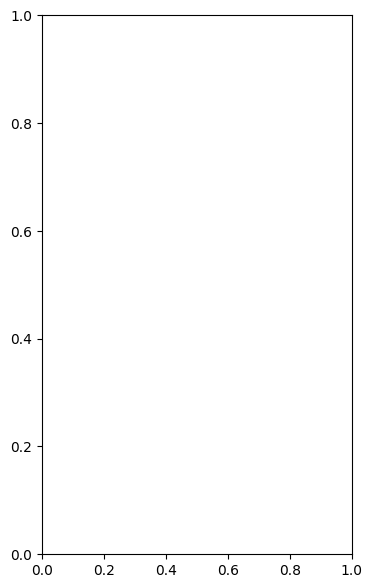

In [8]:
exp.plot_specific_peth(directory_path, brain_region)